<a href="https://colab.research.google.com/github/Kavitha1702/Upskillz/blob/main/credit_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving trainloan.csv to trainloan.csv


{'trainloan.csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,200,360,1,Urban,Y

In [ ]:
dataloan=pd.read_csv('trainloan.csv')

In [ ]:
dataloan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
dataloan.shape

(614, 13)

In [ ]:
dataloan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
dataloan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
dataloan=dataloan.dropna()
dataloan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
dataloan.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
dataloan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,0


In [ ]:
dataloan['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
dataloan=dataloan.replace(to_replace='3+',value=4)

In [ ]:
dataloan['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

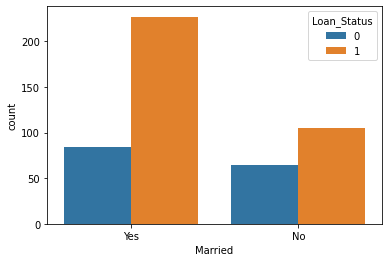

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=dataloan)

In [ ]:
dataloan.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0}})

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,1,1,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,1,1,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


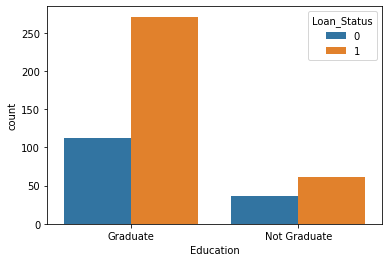

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=dataloan)

In [ ]:
dataloan.replace({'Gender':{'Female':0,'Male':1},'Married':{'No':0,'Yes':1},'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2}}, inplace=True)

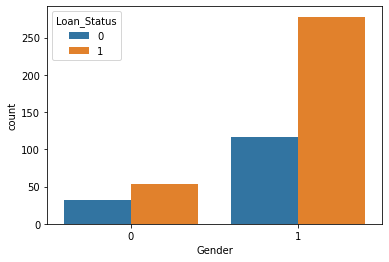

In [ ]:
sns.countplot(x='Gender',hue='Loan_Status',data=dataloan)

In [ ]:
dataloan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2,1
613,LP002990,0,0,0,1,1,4583,0.0,133.0,360.0,0.0,1,0


In [ ]:
x=dataloan.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=dataloan['Loan_Status']

In [ ]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.15,stratify=y,random_state=1)
print(y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [ ]:
print(x.shape,X_train.shape,X_test.shape)

(480, 11) (408, 11) (72, 11)


In [ ]:
model=SVC(kernel='linear')

In [ ]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
prediction=model.predict(X_train)

In [ ]:
evaluation=accuracy_score(prediction,Y_train)

In [ ]:
print(evaluation)

0.7696078431372549


In [ ]:
test_prediction=model.predict(X_test)
evaluation_test=accuracy_score(test_prediction,Y_test)

In [ ]:
print('Testing Accuracy is',evaluation_test)

Testing Accuracy is 0.8611111111111112


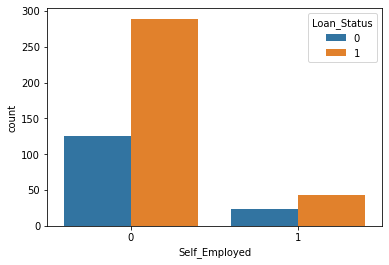

In [ ]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=dataloan)